In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
ncd_drv6 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_drv2406.xlsx')
ncd_drv7 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_drv2407.xlsx')
ncd_drv8 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_drv2408.xlsx')
ncd_drv9 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_drv2409.xlsx')
ncd_drv6 = ncd_drv6[ncd_drv6['미터링일시'] > 20240603]

ncd_box1 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_box2401.xlsx')
ncd_box2 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_box2402.xlsx')
ncd_box3 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_box2403.xlsx')
ncd_box4 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_box2404.xlsx')
ncd_box5 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_box2405.xlsx')
ncd_box6 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_box2406.xlsx')
ncd_box7 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_box2407.xlsx')
ncd_box8 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_box2408.xlsx')
ncd_box9 = pd.read_excel('/Users/user/Documents/NCD 데이터/ncd_box2409.xlsx')

In [3]:
boa1 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2301.xlsx')
boa2 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2302.xlsx')
boa3 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2303.xlsx')
boa4 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2304.xlsx')
boa5 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2305.xlsx')
boa6 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2306.xlsx')
boa7 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2307.xlsx')
boa8 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2308.xlsx')
boa9 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2309.xlsx')
boa10 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2310.xlsx')
boa11 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2311.xlsx')
boa12 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2312.xlsx')
boa13 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2401.xlsx')
boa14 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2402.xlsx')
boa15 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2403.xlsx')
boa16 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2404.xlsx')
boa17 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2405.xlsx')
boa18 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2406.xlsx')
boa19 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2407.xlsx')
boa20 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2408.xlsx')
boa21 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2409.xlsx')

In [4]:
boa = [boa1, boa2, boa3, boa4, boa5, boa6, boa7, boa8, boa9, boa10,
      boa11, boa12, boa13, boa14, boa15, boa16, boa17, boa18, boa19, boa20, boa21]

for i in range(0, len(boa)) :
    boa[i] = boa[i][boa[i]['paid user 여부']=='paid']

In [5]:
works = []
drive = []
box = []
place = []
for i in range(0,12) :
    w = boa[i][boa[i]['구분3']=='NAVER WORKS']
    b = boa[i][boa[i]['구분3']=='WORKBOX']
    p = boa[i][boa[i]['구분3']=='WORKPLACE']
    works.append(w)
    box.append(b)
    place.append(p)

for i in range(12, 21) :
    w = boa[i][boa[i]['구분3']=='NAVER WORKS']
    d = boa[i][boa[i]['상품명'].str[0:7] == '웍스 드라이브']
    b = boa[i][(boa[i]['상품명'].str[0:7] == 'Workbox')|(boa[i]['상품명'].str[0:5] == '부가서비스')]
    p = boa[i][boa[i]['구분3']=='WORKPLACE']
    works.append(w)
    drive.append(d)
    box.append(b)
    place.append(p)

In [6]:
def net_sales_ratio (df) :
    ratio_list = []
    for i in range(0, len(df)) :
        ratio = df[i]['매출금액(당월)'].sum()/df[i]['이용금액(당월)'].sum()
        ratio_list.append(ratio)

    return ratio_list

works_net_sales_ratio = net_sales_ratio(works)
drive_net_sales_ratio = net_sales_ratio(drive)
box_net_sales_ratio = net_sales_ratio(box)
place_net_sales_ratio = net_sales_ratio(place)

/var/folders/yj/y3b7nzyn7zv0l9bkqtj_37g40000gn/T/ipykernel_6667/56371664.py:4: RuntimeWarning: invalid value encountered in scalar divide
  ratio = df[i]['매출금액(당월)'].sum()/df[i]['이용금액(당월)'].sum()


In [8]:
drive_net_sales_ratio = [None] * (len(works_net_sales_ratio) - 5) + drive_net_sales_ratio[-5:]

In [9]:
ratio_summary = pd.DataFrame([works_net_sales_ratio,drive_net_sales_ratio,box_net_sales_ratio,place_net_sales_ratio]).T
ratio_summary.columns = ['WORKS','DRIVE','BOX','PLACE']
mean2024 = [pd.Series(works_net_sales_ratio[12:]).mean(), pd.Series(drive_net_sales_ratio[12:]).mean(), pd.Series(box_net_sales_ratio[12:]).mean(), pd.Series(place_net_sales_ratio[12:]).mean()]
mean2024_df = pd.DataFrame([mean2024], columns=['WORKS','DRIVE','BOX','PLACE'])
ratio_summary = pd.concat([ratio_summary, mean2024_df], ignore_index=True)
date_range = pd.date_range(start='2023-01-01', end='2024-09-30', freq='MS').strftime('%Y년 %m월')
date_range = list(date_range)
date_range.append('2024년 평균')
date_range = pd.Index(date_range)
ratio_summary.index = date_range
ratio_summary

,WORKS,DRIVE,BOX,PLACE
2023년 01월,0.710304,NaN,0.979425,0.747933
2023년 02월,0.698423,NaN,0.984410,0.747063
2023년 03월,0.701132,NaN,0.977315,0.739019
2023년 04월,0.701264,NaN,0.969177,0.739249
2023년 05월,0.698750,NaN,0.981245,0.741676
2023년 06월,0.703963,NaN,0.981221,0.741048
2023년 07월,0.705288,NaN,0.981386,0.754233
2023년 08월,0.704590,NaN,0.981483,0.756197
2023년 09월,0.696185,NaN,0.976340,0.760859
2023년 10월,0.691076,NaN,0.978763,0.759139


In [10]:
works_od = []
works_pt = []
for i in range(0, len(works)) :
    works_od.append(works[i][works[i]['채널'] != '파트너 매출'])
    works_pt.append(works[i][works[i]['채널'] == '파트너 매출'])

drive_od = []
drive_pt = []
for i in range(0, len(drive)) :
    drive_od.append(drive[i][drive[i]['채널'] != '파트너 매출'])
    drive_pt.append(drive[i][drive[i]['채널'] == '파트너 매출'])

box_od = []
box_pt = []
for i in range(0, len(box)) :
    box_od.append(box[i][box[i]['채널'] != '파트너 매출'])
    box_pt.append(box[i][box[i]['채널'] == '파트너 매출'])

place_od = []
place_pt = []
for i in range(0, len(place)) :
    place_od.append(place[i][place[i]['채널'] != '파트너 매출'])
    place_pt.append(place[i][place[i]['채널'] == '파트너 매출'])

In [11]:
c = []
for i in range(0,len(place_pt)) :
    a = place_pt[i]['이용금액(당월)'].sum()
    b = place_pt[i]['매출금액(당월)'].sum()
    c.append([a,b])

c = pd.DataFrame(c)

#c.to_excel('/Users/user/Documents/업무문서/ww.xlsx',index=False)

In [12]:
works_net_sales_ratio = mean2024[0]
drive_net_sales_ratio = mean2024[1]
box_net_sales_ratio = mean2024[2]
place_net_sales_ratio = mean2024[3]

In [13]:
promotion = pd.read_excel('/Users/user/Documents/진행중 업무/웍스오픈프로모션_24.06-09대상자_241010_v3.xlsx', sheet_name=None)

In [15]:
july = list(promotion.keys())[2]
july_promotion = promotion[july]
july_promotion = july_promotion.iloc[1:,0:6]
july_promotion = july_promotion.drop(411, axis=0)
july_promotion['domain_id'] = july_promotion['domain_id'].astype(int)

august = list(promotion.keys())[3]
august_promotion = promotion[august]
august_promotion = august_promotion.iloc[1:,0:6]
august_promotion['domain_id'] = august_promotion['domain_id'].astype(int)

september = list(promotion.keys())[4]
september_promotion = promotion[september]
september_promotion = september_promotion.iloc[1:,0:6]
september_promotion['domain_id'] = september_promotion['domain_id'].astype(int)

In [16]:
july_works_promotion = july_promotion[july_promotion['base_item_id 상품명'].str[0:3] == 'COR']
july_drive_promotion = july_promotion[july_promotion['base_item_id 상품명'].str[0:3] == 'DRV']
july_place_promotion = july_promotion[july_promotion['base_item_id 상품명'].str[0:3].isin(['APP','ATT','FIN','PAY'])]

august_works_promotion = august_promotion[august_promotion['base_item_id 상품명'].str[0:3] == 'COR']
august_drive_promotion = august_promotion[august_promotion['base_item_id 상품명'].str[0:3] == 'DRV']
august_place_promotion = august_promotion[august_promotion['base_item_id 상품명'].str[0:3].isin(['APP','ATT','FIN','PAY'])]

september_works_promotion = september_promotion[september_promotion['base_item_id 상품명'].str[0:3] == 'COR']
september_drive_promotion = september_promotion[september_promotion['base_item_id 상품명'].str[0:3] == 'DRV']
september_place_promotion = september_promotion[september_promotion['base_item_id 상품명'].str[0:3].isin(['APP','ATT','FIN','PAY'])]

works_promotion = [july_works_promotion, august_works_promotion, september_works_promotion]
drive_promotion = [july_drive_promotion, august_drive_promotion, september_drive_promotion]
place_promotion = [july_place_promotion, august_place_promotion, september_place_promotion]

In [17]:
works2 = []
for i in range(0, 12) :
    w = works[i]
    works2.append(w)
for i in range(12, 21) :
    w = works[i][works[i]['상품명'].isin(['NAVER WORKS LITE','NAVER WORKS LITE (Deprecated)','NAVER WORKS BASIC','NAVER WORKS BASIC (Deprecated)','NAVER WORKS PREMIUM','NAVER WORKS PREMIUM (Deprecated)','웍스 코어 Lite','웍스 코어 Standard','웍스 코어 Standard Plus'])]
    works2.append(w)
works_month_summary = []
for i in range(12, len(works2)):
    df = works2[i]
    if all(col in df.columns for col in ['단위사용량', '매출금액(당월)', '이용금액(당월)']):
        df.loc[:, '단위사용량'] = pd.to_numeric(df['단위사용량'], errors='coerce')
        df.loc[:, '매출금액(당월)'] = pd.to_numeric(df['매출금액(당월)'], errors='coerce')
        df.loc[:, '이용금액(당월)'] = pd.to_numeric(df['이용금액(당월)'], errors='coerce')
        
        j = len(df['회원번호'].unique())
        k = df['단위사용량'].sum(skipna=True)
        l = df['이용금액(당월)'].sum(skipna=True)
        m = df['매출금액(당월)'].sum(skipna=True)
        
        works_month_summary.append([j, k, l, m])
    else:
        print(f"Missing columns in DataFrame at index {i}")

drive_month_summary = []
for i in range(4, len(drive)):
    df = drive[i]
    if all(col in df.columns for col in ['단위사용량', '매출금액(당월)', '이용금액(당월)']):
        df.loc[:, '단위사용량'] = pd.to_numeric(df['단위사용량'], errors='coerce')
        df.loc[:, '매출금액(당월)'] = pd.to_numeric(df['매출금액(당월)'], errors='coerce')
        df.loc[:, '이용금액(당월)'] = pd.to_numeric(df['이용금액(당월)'], errors='coerce')
        
        j = len(df['회원번호'].unique())
        k = df['단위사용량'].sum(skipna=True)
        l = df['이용금액(당월)'].sum(skipna=True)
        m = df['매출금액(당월)'].sum(skipna=True)
        
        drive_month_summary.append([j, k, l, m])
    else:
        print(f"Missing columns in DataFrame at index {i}")

place_month_summary = []
for i in range(12, len(place)):
    df = place[i]
    if all(col in df.columns for col in ['단위사용량', '매출금액(당월)', '이용금액(당월)']):
        df.loc[:, '단위사용량'] = pd.to_numeric(df['단위사용량'], errors='coerce')
        df.loc[:, '매출금액(당월)'] = pd.to_numeric(df['매출금액(당월)'], errors='coerce')
        df.loc[:, '이용금액(당월)'] = pd.to_numeric(df['이용금액(당월)'], errors='coerce')
        
        j = len(df['회원번호'].unique())
        k = df[df['상품명'].isin(['WORKPLACE Lite','WORKPLACE Lite (Deprecated)','WORKPLACE Basic','WORKPLACE Basic (Deprecated)','WORKPLACE Finance','WORKPLACE Finance (Deprecated)','WORKPLACE HR','WORKPLACE HR (Deprecated)','웍스 결재'])]['단위사용량'].sum(skipna=True)
        l = df['이용금액(당월)'].sum(skipna=True)
        m = df['매출금액(당월)'].sum(skipna=True)
        
        place_month_summary.append([j, k, l, m])
    else:
        print(f"Missing columns in DataFrame at index {i}")

In [18]:
works_promotion_addition = []
for i in range(0, len(works_promotion)) :
    a = len(works_promotion[i]['회원번호'].unique())
    b = works_promotion[i]['usercount'].sum()
    c = works_promotion[i]['이용금액'].sum()
    d = c * (works_net_sales_ratio)
    works_promotion_addition.append([a,b,c,d])

drive_promotion_addition = []
for i in range(0, len(drive_promotion)) :
    a = len(drive_promotion[i]['회원번호'].unique())
    b = drive_promotion[i]['usercount'].sum()
    c = drive_promotion[i]['이용금액'].sum()
    d = c * (drive_net_sales_ratio)
    drive_promotion_addition.append([a,b,c,d])

place_promotion_addition = []
for i in range(0, len(place_promotion)) :
    a = len(place_promotion[i]['회원번호'].unique())
    b = place_promotion[i]['usercount'].sum()
    c = place_promotion[i]['이용금액'].sum()
    d = c * (place_net_sales_ratio)
    place_promotion_addition.append([a,b,c,d])

In [19]:
for i in range(0, len(works_promotion_addition)) :
    j = works_month_summary[-1]
    j = [a + b for a, b in zip(j, works_promotion_addition[i])]
    works_month_summary.append(j)
    
for i in range(0, len(drive_promotion_addition)) :
    j = drive_month_summary[-1]
    j = [a + b for a, b in zip(j, drive_promotion_addition[i])]
    drive_month_summary.append(j)

for i in range(0, len(place_promotion_addition)) :
    j = place_month_summary[-1]
    j = [a + b for a, b in zip(j, place_promotion_addition[i])]
    place_month_summary.append(j)

In [20]:
works_month_summary = pd.DataFrame(works_month_summary)
drive_month_summary = pd.DataFrame(drive_month_summary)
place_month_summary = pd.DataFrame(place_month_summary)


In [21]:
works_month_summary.columns = ['도메인 Count','단위사용량 Count','이용금액 합계','매출금액 합계']
date_range = pd.date_range(start='2024-01-01', end='2024-12-31', freq='MS').strftime('%Y년 %m월')
works_month_summary.index = date_range

drive_month_summary.columns = ['도메인 Count','단위사용량 Count','이용금액 합계','매출금액 합계']
date_range = pd.date_range(start='2024-05-01', end='2024-12-31', freq='MS').strftime('%Y년 %m월')
drive_month_summary.index = date_range

place_month_summary.columns = ['도메인 Count','단위사용량 Count','이용금액 합계','매출금액 합계']
date_range = pd.date_range(start='2024-01-01', end='2024-12-31', freq='MS').strftime('%Y년 %m월')
place_month_summary.index = date_range

In [22]:
works_month_summary

,도메인 Count,단위사용량 Count,이용금액 합계,매출금액 합계
2024년 01월,25871,294427.8900,2.271759e+09,1.591739e+09
2024년 02월,26088,297974.1900,2.300466e+09,1.596373e+09
2024년 03월,26377,302697.9600,2.334150e+09,1.631336e+09
2024년 04월,26601,305599.9900,2.351864e+09,1.648133e+09
2024년 05월,26808,324954.1000,2.474101e+09,1.734595e+09
2024년 06월,26918,316039.0100,2.441044e+09,1.706054e+09
2024년 07월,27201,319023.1500,2.467905e+09,1.729325e+09
2024년 08월,27286,320528.4600,2.505803e+09,1.763179e+09
2024년 09월,27096,327482.8200,2.539566e+09,1.769181e+09
2024년 10월,27417,328809.3756,2.549324e+09,1.776015e+09


In [23]:
drive_month_summary

,도메인 Count,단위사용량 Count,이용금액 합계,매출금액 합계
2024년 05월,1,0.1900,1350.0,1.144737e+03
2024년 06월,10,9.5200,60960.0,4.985016e+04
2024년 07월,79,528.3200,3255100.0,2.704390e+06
2024년 08월,162,647.4700,3378650.0,2.728111e+06
2024년 09월,217,1020.6100,5159800.0,4.182081e+06
2024년 10월,256,1158.7211,5840133.3,4.741926e+06
2024년 11월,326,1421.4989,7308911.2,5.950581e+06
2024년 12월,414,1783.2768,9146245.0,7.462519e+06


In [24]:
place_month_summary

,도메인 Count,단위사용량 Count,이용금액 합계,매출금액 합계
2024년 01월,1857,51160.4100,2.343279e+08,1.782298e+08
2024년 02월,1910,53839.7700,2.462624e+08,1.840177e+08
2024년 03월,1930,54125.8600,2.480228e+08,1.869209e+08
2024년 04월,1957,56547.9700,2.589316e+08,1.908662e+08
2024년 05월,1996,55460.4100,2.558396e+08,1.887913e+08
2024년 06월,1995,48535.8300,2.353061e+08,1.712811e+08
2024년 07월,2046,49607.5200,2.402533e+08,1.711891e+08
2024년 08월,2107,50170.2100,2.896648e+08,2.168492e+08
2024년 09월,2159,52582.5100,3.006090e+08,2.221279e+08
2024년 10월,2185,53113.0656,3.020642e+08,2.232055e+08


In [25]:
#place_month_summary.to_excel('/Users/user/Documents/업무문서/ww.xlsx')

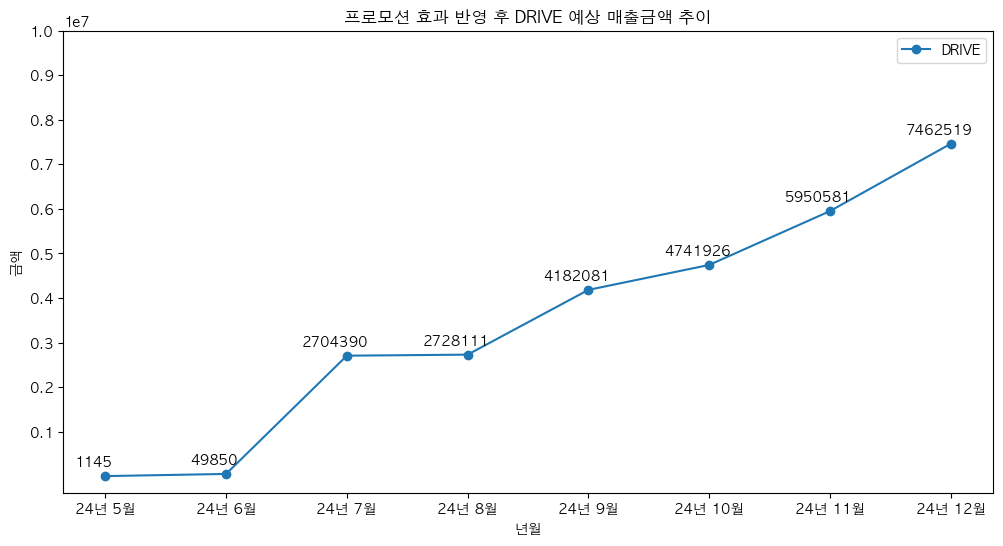

In [26]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

fig, ax = plt.subplots(figsize=(12, 6))

x = range(len(drive_month_summary))

plt.plot(x, drive_month_summary['매출금액 합계'], marker='o', label='DRIVE')

plt.title('프로모션 효과 반영 후 DRIVE 예상 매출금액 추이')
plt.xlabel('년월')
plt.ylabel('금액')

y_values = [1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000,]
plt.yticks(y_values)

x_ticks_positions = range(0, len(drive_month_summary))
x_labels = ['24년 5월','24년 6월','24년 7월','24년 8월','24년 9월','24년 10월','24년 11월','24년 12월',]
plt.xticks(x_ticks_positions, x_labels)

plt.legend()

for i, v in enumerate(drive_month_summary['매출금액 합계']):
    plt.text(i - 0.1, v + 150000, str(round(v)), ha='center', va='bottom')

plt.show()

In [27]:
migration = pd.read_excel('/Users/user/Documents/진행중 업무/마이그레이션 대상(10월 23일).xlsx')
boa789 = pd.concat([boa[17],boa[18],boa[19],boa[20]])
boa789['단위사용량'] = pd.to_numeric(boa789['단위사용량'], errors='coerce')
boa789_drv = boa789[boa789['상품명'].str[0:7]=='웍스 드라이브']
migration_true = migration[~migration['회원번호'].isin(boa789_drv['회원번호'])]
boa789_box_drv = boa789[boa789['구분3']=='WORKBOX']
boa789_user = boa789_box_drv.drop_duplicates(subset = ['회원번호','구분3'], keep = 'last')[['회원번호','단위사용량']]
migration_true = pd.merge(migration_true,boa789_user,how = 'left',on = '회원번호')

In [28]:
migration_true.loc[migration_true['회원번호']==2586832,'단위사용량'] = 2
migration_true.loc[migration_true['회원번호']==2773984,'단위사용량'] = 2
migration_true.loc[migration_true['회원번호']==2689023,'단위사용량'] = 54
migration_true.loc[migration_true['회원번호']==2552351,'단위사용량'] = 0
migration_true.loc[migration_true['회원번호']==3152823,'단위사용량'] = 0

In [29]:
ncd = pd.read_csv('/Users/user/Documents/진행중 업무/ncd_metering2.csv')

/var/folders/yj/y3b7nzyn7zv0l9bkqtj_37g40000gn/T/ipykernel_6667/4125878327.py:1: DtypeWarning: Columns (31,35,36,41,43,47,48,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  ncd = pd.read_csv('/Users/user/Documents/진행중 업무/ncd_metering2.csv')


In [30]:
box6 = pd.read_excel('/Users/user/Documents/진행중 업무/WORKBOX 가입자 현황(6월).xlsx')
ncd = ncd[['회원번호','미터링일시','regist_ymd','사용량','요금','plan']]
ncd_cor = ncd[ncd['plan'].str[0:3].isin(['COR'])]
ncd_cor = ncd_cor.copy()
ncd_cor['plan_prefix'] = ncd_cor['plan'].str[0:3]
ncd_cor_new = ncd_cor[ncd_cor['regist_ymd'].str[0:7].isin(['2024.7.','2024.8.','2024.9.','2024.10'])]
ncd_cor_new = ncd_cor_new.sort_values(by = ['회원번호','plan_prefix','미터링일시','사용량'])
ncd_cor_new = ncd_cor_new.drop_duplicates(subset = ['회원번호','plan_prefix'], keep = 'last')
migration_cor = pd.merge(box6,ncd_cor_new, how = 'inner',on='회원번호')
ncd_drv = ncd[ncd['plan'].str[0:3].isin(['DRV'])]
ncd_drv = ncd_drv.copy()
ncd_drv['plan_prefix'] = ncd_drv['plan'].str[0:3]
ncd_drv_new = ncd_drv[ncd_drv['regist_ymd'].str[0:7].isin(['2024.7.','2024.8.','2024.9.','2024.10'])]
ncd_drv_new = ncd_drv_new.sort_values(by = ['회원번호','plan_prefix','미터링일시','사용량'])
ncd_drv_new = ncd_drv_new.drop_duplicates(subset = ['회원번호','plan_prefix'], keep = 'last')
migration_drv = pd.merge(box6,ncd_drv_new, how = 'inner',on='회원번호')

In [31]:
migration_cor.loc[migration_cor['plan'] == 'COR_T','요금'] = 12000
migration_drv.loc[migration_drv['plan'] == 'DRV_T','요금'] = 7000
migration_cor = migration_cor[migration_cor['사용량']>0]
migration_drv = migration_drv[migration_drv['사용량']>0]
migration_cor['이용금액'] = migration_cor['사용량'] * migration_cor['요금']
migration_cor['매출금액'] = migration_cor['이용금액'] * ratio_summary.loc['2024년 평균','WORKS']
migration_drv['이용금액'] = migration_drv['사용량'] * migration_drv['요금']
migration_drv['매출금액'] = migration_drv['이용금액'] * ratio_summary.loc['2024년 평균','DRIVE']

In [238]:
a = 0
b = 0
c = 0
d = 0
drive_promotion_addition = []
for i in range(0, len(drive_promotion)) :
    a = a + len(drive_promotion[i]['회원번호'].unique())
    b = b + drive_promotion[i]['usercount'].sum()
    c = c + drive_promotion[i]['이용금액'].sum()
    d = c * (drive_net_sales_ratio)
    drive_promotion_addition.append([a,b,c,d])

drive_promotion_addition = pd.DataFrame(drive_promotion_addition)

In [262]:
drive_promotion_addition.columns = ['도메인 수','유저 총합','이용금액','매출금액']
drive_promotion_addition.index = ['2024년 10월','2024년 11월','2024년 12월']
drive_promotion_addition.to_excel('/Users/user/Documents/진행중 업무/drive_promotion_addition.xlsx')

In [246]:
drive_migration_addition = []
for i in range(1,4) :
    a = round(len(migration_drv)*(i/3))
    b = round(migration_drv['사용량'].sum()*(i/3))
    c = round(migration_drv['이용금액'].sum()*(i/3))
    d = round(migration_drv['매출금액'].sum()*(i/3))
    drive_migration_addition.append([a,b,c,d])

drive_migration_addition = pd.DataFrame(drive_migration_addition)

In [264]:
drive_migration_addition.columns = ['도메인 수','유저 총합','이용금액','매출금액']
drive_migration_addition.index = ['2024년 10월','2024년 11월','2024년 12월']
drive_migration_addition.to_excel('/Users/user/Documents/진행중 업무/drive_migration_addition.xlsx')

In [250]:
works_migration_addition = []
for i in range(1,4) :
    a = round(len(migration_cor)*(i/3))
    b = round(migration_cor['사용량'].sum()*(i/3))
    c = round(migration_cor['이용금액'].sum()*(i/3))
    d = round(migration_cor['매출금액'].sum()*(i/3))
    works_migration_addition.append([a,b,c,d])

works_migration_addition = pd.DataFrame(works_migration_addition)

In [266]:
works_migration_addition.columns = ['도메인 수','유저 총합','이용금액','매출금액']
works_migration_addition.index = ['2024년 10월','2024년 11월','2024년 12월']
works_migration_addition.to_excel('/Users/user/Documents/진행중 업무/works_migration_addition.xlsx')

In [227]:
box_month_summary = []
for i in range(12,len(box)) :
    a = len(box[i])
    b = box[i]['단위사용량'].sum()
    c = box[i]['이용금액(당월)'].sum()
    d = box[i]['매출금액(당월)'].sum()
    box_month_summary.append([a,b,c,d])

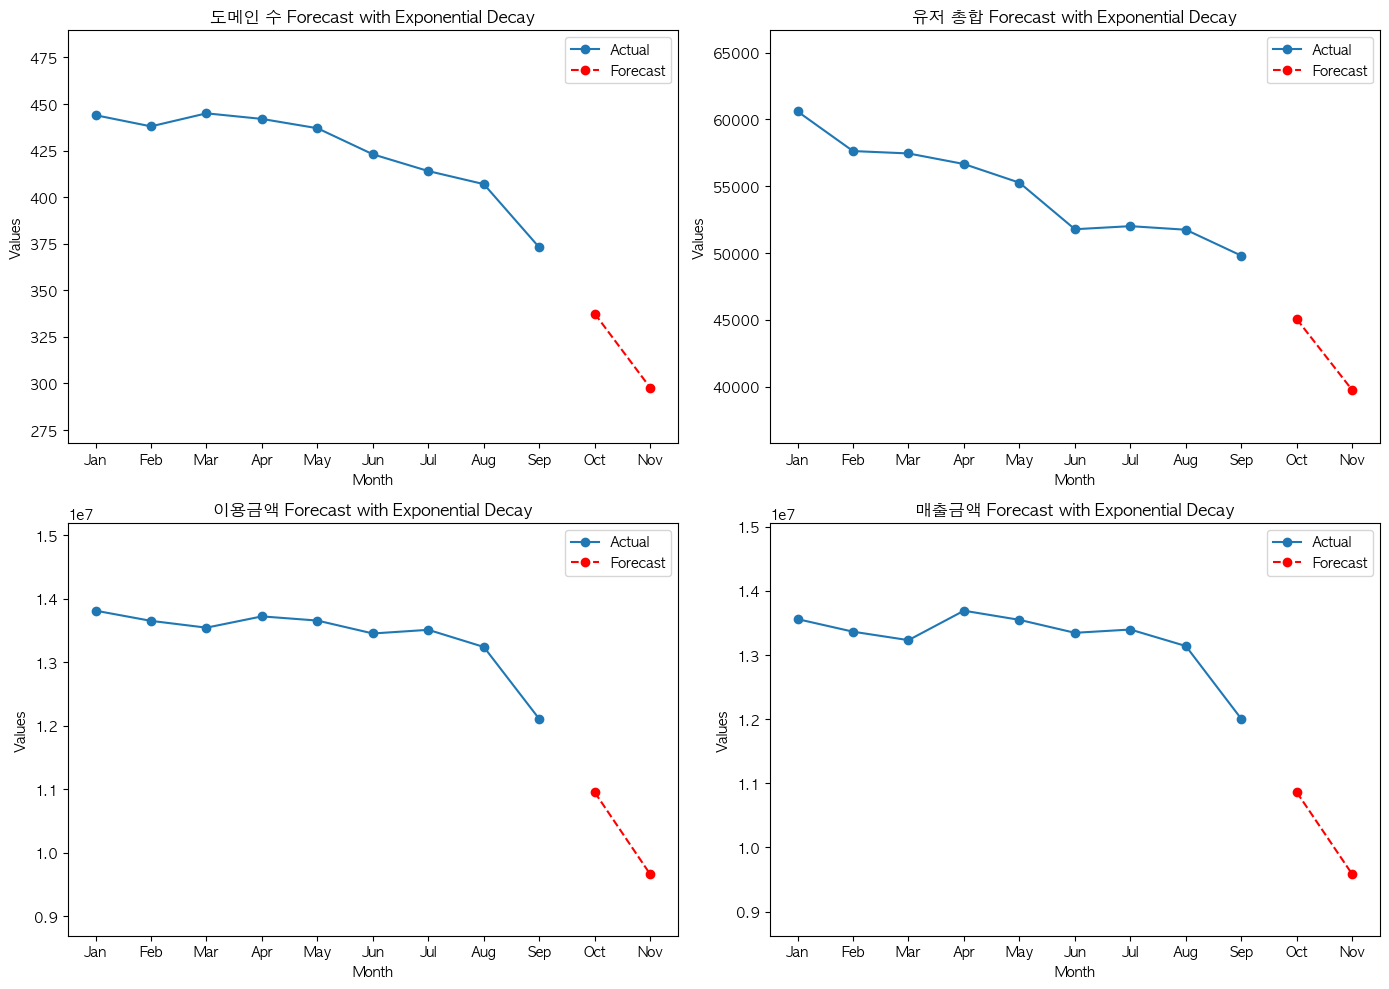

          도메인 수         유저 총합          이용금액          매출금액
Oct  337.421442  45057.576809  1.095076e+07  1.085948e+07
Nov  297.681938  39750.961570  9.661048e+06  9.580510e+06


In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 예제 데이터 설정
box_month_summary = {
    '월': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'],
    '도메인 수': [444, 438, 445, 442, 437, 423, 414, 407, 373],
    '유저 총합': [60600.08, 57634.96, 57456.63, 56665.77, 55269.48, 51786.84, 52016.71, 51749.55, 49808.56],
    '이용금액': [13811330, 13650780, 13543570, 13721140, 13655430, 13452210, 13509610, 13239800, 12105440],
    '매출금액': [13560686.42, 13364548.72, 13232520.62, 13691872.83, 13549033.58, 13346958.82, 13398084.34, 13140671.12, 12004525.41]
}

# DataFrame 생성 및 인덱스 설정
df = pd.DataFrame(box_month_summary)
df.set_index('월', inplace=True)

# 최근 몇 개월 평균 감소율을 바탕으로 기본 감소율 계산
initial_decay_rate = 1 - (df['도메인 수'].iloc[-1] / df['도메인 수'].iloc[-2])  # 8월-9월 감소율 계산

# 예측 결과 저장
predictions = {}
for column in df.columns:
    # 9월에서 10월 감소율을 더 크게 설정해 지수 감소 형태를 만듦
    forecast_oct = df[column].iloc[-1] * np.exp(-initial_decay_rate * 1.2)  # 약간 더 큰 감소율 적용
    forecast_nov = forecast_oct * np.exp(-initial_decay_rate * 1.5)  # 더 큰 감소율 적용
    
    # 예측값 저장
    predictions[column] = [forecast_oct, forecast_nov]

# 예측 결과 DataFrame 생성
forecast_df = pd.DataFrame(predictions, index=['Oct', 'Nov'])

# 예측 결과 시각화
plt.figure(figsize=(14, 10))

for idx, column in enumerate(df.columns, 1):
    plt.subplot(2, 2, idx)
    plt.plot(df.index, df[column], label='Actual', marker='o')
    plt.plot(['Oct', 'Nov'], forecast_df[column], linestyle='--', marker='o', color='red', label='Forecast')
    plt.title(f'{column} Forecast with Exponential Decay')
    plt.xlabel('Month')
    plt.ylabel('Values')
    
    # y축 범위 설정: 각 컬럼의 최소값과 예측값에 맞춰서 설정
    y_min = min(df[column].min(), forecast_df[column].min()) * 0.9
    y_max = max(df[column].max(), forecast_df[column].max()) * 1.1
    plt.ylim(y_min, y_max)
    
    plt.legend()

plt.tight_layout()
plt.show()

# 예측 결과 출력
print(forecast_df)



In [232]:
box_month_summary = pd.DataFrame(box_month_summary)
forecast_df = pd.DataFrame(forecast_df)
box_month_summary = pd.concat([box_month_summary,forecast_df])
box_month_summary.set_index('월', inplace=True)
december_data = pd.DataFrame({'도메인 수': [0], '유저 총합': [0], '이용금액': [0], '매출금액': [0]}, index=['Dec'])
box_month_summary = pd.concat([box_month_summary, december_data])
index_list = box_month_summary.index.to_list()  # 인덱스를 리스트로 변환
index_list[-3] = 'Oct'  # 마지막에서 세 번째를 'Oct'로 설정
index_list[-2] = 'Nov'  # 마지막에서 두 번째를 'Nov'로 설정
box_month_summary.index = index_list  # 수정된 리스트를 인덱스로 재설정


In [268]:
#box_month_summary.to_excel('/Users/user/Documents/진행중 업무/box_month_summary.xlsx')